# Bussines case

## Carvak stock case


## Introduction

We will be using the stock data set. This data set contains various opening and closing value,highest and lowest value,date and adjusted closing value. It also contains a volume of stock and date. The name of the file is `Stock.csv`.


In [4]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
 
import warnings
warnings.filterwarnings('ignore')

For this lab, we will be using the following libraries:

pandasPandas – This library helps to load the data frame in a 2D array format and has multiple functions to perform analysis tasks in one go.

Numpy – Numpy arrays are very fast and can perform large computations in a very short time.

Matplotlib/Seaborn – This library is used to draw visualizations.

Sklearn – This module contains multiple libraries having pre-implemented functions to perform tasks from data preprocessing to model development and evaluation.

XGBoost – This contains the eXtreme Gradient Boosting machine learning algorithm which is one of the algorithms which helps us to achieve high accuracy on predictions.

## **Reading and understanding our data**


In [5]:
### BEGIN SOLUTION
data = pd.read_csv("/Users/mertdil/Downloads/KARVAK_Case-with stock_ml_model/Carvak Case - Data (1) (1).csv", sep=',')

In [6]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,31.12.2013,184.0700073,184.690002,183.929993,184.690002,162.482605,86119900
1,2.01.2014,183.9799957,184.070007,182.479996,182.919998,160.925400,119636900
2,3.01.2014,NaN,183.600006,182.630005,182.889999,160.898972,81390600
3,6.01.2014,183.4900055,183.559998,182.080002,182.360001,160.432693,108028200
4,7.01.2014,183.0899963,183.789993,182.949997,183.479996,161.418060,86144200


In [7]:
data.shape

(1593, 7)

From this, we got to know that there are 1593 rows of data available and for each row, we have 7 different features or columns.

In [8]:
data.dtypes

Date          object
Open          object
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593 entries, 0 to 1592
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1593 non-null   object 
 1   Open       1581 non-null   object 
 2   High       1593 non-null   float64
 3   Low        1592 non-null   float64
 4   Close      1570 non-null   float64
 5   Adj Close  1592 non-null   float64
 6   Volume     1593 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 87.2+ KB


According to the output above, we have 1593 entries or rows, as well as 7 features. The "Non-Null Count" column shows the number of non-null entries.  If the count is 1593 then there is no missing values for that particular feature. The 'close' is our target, or response variable, and the rest of the features are our predictor variables.

We also have a mix of numerical (1 int64 and 4 float64 ) and object data types (2 object).

The `describe()` function will provide the statistical information about all numeric values.

In [10]:
data["Open"]

0        184.0700073
1        183.9799957
2                NaN
3        183.4900055
4        183.0899963
            ...     
1588     280.4899902
1589      280.730011
1590     285.1199951
1591      291.019989
1592    a291.5299988
Name: Open, Length: 1593, dtype: object

We have errors in data that is Open column have non numberic variables:"a291.5299988" and have null variables. We need to do data cleaning.

In [11]:
data["High"]

0       184.690002
1       184.070007
2       183.600006
3       183.559998
4       183.789993
           ...    
1588    283.940002
1589    283.700012
1590    288.269989
1591    291.399994
1592    294.880005
Name: High, Length: 1593, dtype: float64

In [12]:
data["Adj Close"]

0       162.482605
1       160.925400
2       160.898972
3       160.432693
4       161.418060
           ...    
1588    277.857239
1589    281.730225
1590    285.792328
1591    284.478149
1592    291.925354
Name: Adj Close, Length: 1593, dtype: float64

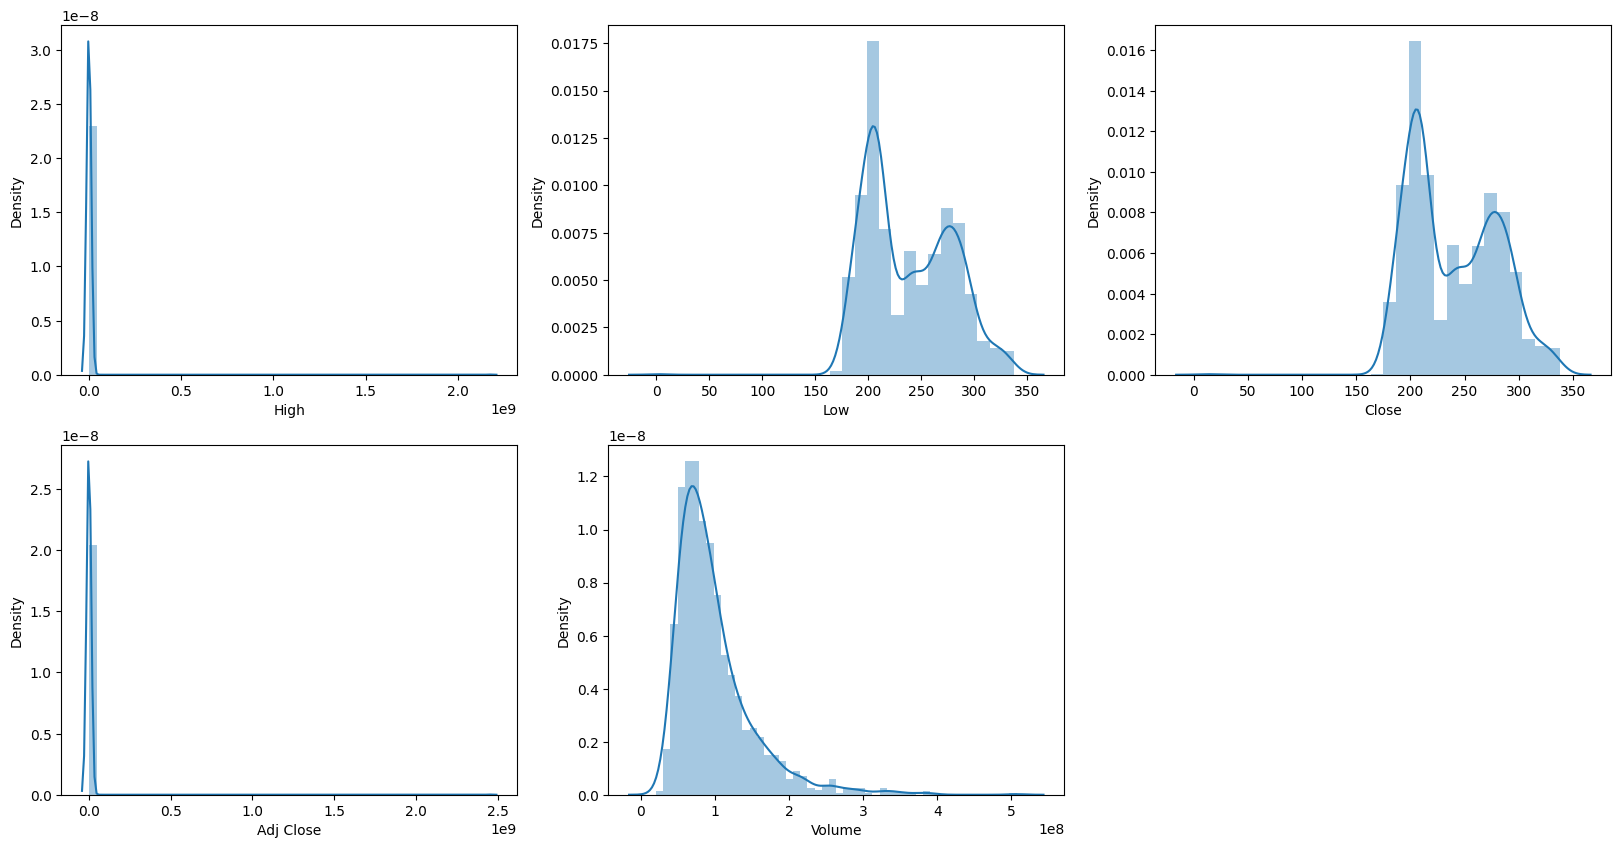

In [15]:
features = ['High', 'Low', 'Close','Adj Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(data[col])
plt.show()

In [ ]:
data.describe()

,High,Low,Close,Adj Close,Volume
count,1.593000e+03,1592.000000,1570.000000,1.592000e+03,1.593000e+03
mean,1.363517e+06,238.173467,239.925261,1.550346e+06,9.864715e+07
std,5.441165e+07,40.326966,40.540985,6.140617e+07,5.275211e+07
min,1.755600e+02,2.000000,11.690002,1.000000e+00,2.027000e+07
25%,2.068600e+02,204.765003,205.745003,1.865718e+02,6.385500e+07
50%,2.351400e+02,233.110001,235.144997,2.198170e+02,8.507920e+07
75%,2.761200e+02,273.129997,274.967491,2.648821e+02,1.165700e+08
max,2.171700e+09,337.480011,338.339996,2.450045e+09,5.072443e+08


we have errors in data that is High and Adj Close column have mean error.This columns have some low quality datas. We need to do data cleaning.

## **Data Cleaning and Wrangling**
Here, we will check if we have any missing values.

In [ ]:
import pandas as pd

def convert_to_float(data, column_name):
    try:
        data[column_name] = data[column_name].astype(float)
    except ValueError:
        # If ValueError error is received, replace only non-numeric cells with "NaN" values
        data[column_name] = pd.to_numeric(data[column_name], errors='coerce')
        
    return data


Converts the specified column in the given data frame to type "float".
Converts cells containing numeric values in data of type "object" to type "float".

In [ ]:
convert_to_float(data, "Open")

,Date,Open,High,Low,Close,Adj Close,Volume
0,31.12.2013,184.070007,184.690002,183.929993,184.690002,162.482605,86119900
1,2.01.2014,183.979996,184.070007,182.479996,182.919998,160.925400,119636900
2,3.01.2014,NaN,183.600006,182.630005,182.889999,160.898972,81390600
3,6.01.2014,183.490005,183.559998,182.080002,182.360001,160.432693,108028200
4,7.01.2014,183.089996,183.789993,182.949997,183.479996,161.418060,86144200
...,...,...,...,...,...,...,...
1588,23.04.2020,280.489990,283.940002,278.750000,279.079987,277.857239,104709700
1589,24.04.2020,280.730011,283.700012,278.500000,282.970001,281.730225,85166000
1590,27.04.2020,285.119995,288.269989,284.619995,287.049988,285.792328,77896600
1591,28.04.2020,291.019989,291.399994,285.399994,285.730011,284.478149,105270000


We have prepared a function to make our string value in object form float. Our open value must be in float form for the model

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593 entries, 0 to 1592
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1593 non-null   object 
 1   Open       1580 non-null   float64
 2   High       1593 non-null   float64
 3   Low        1592 non-null   float64
 4   Close      1570 non-null   float64
 5   Adj Close  1592 non-null   float64
 6   Volume     1593 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 87.2+ KB


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1580.000000,1.593000e+03,1592.000000,1570.000000,1.592000e+03,1.593000e+03
mean,239.357317,1.363517e+06,238.173467,239.925261,1.550346e+06,9.864715e+07
std,39.915021,5.441165e+07,40.326966,40.540985,6.140617e+07,5.275211e+07
min,174.779999,1.755600e+02,2.000000,11.690002,1.000000e+00,2.027000e+07
25%,205.784996,2.068600e+02,204.765003,205.745003,1.865718e+02,6.385500e+07
50%,233.745003,2.351400e+02,233.110001,235.144997,2.198170e+02,8.507920e+07
75%,274.507500,2.761200e+02,273.129997,274.967491,2.648821e+02,1.165700e+08
max,337.790008,2.171700e+09,337.480011,338.339996,2.450045e+09,5.072443e+08


For outlier values that are below the average, we use the quantile method.

In [ ]:
q1 = data['High'].quantile(0.25)
q3 = data['High'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 'B' sütunundaki aykırı değerleri 'mean' yerine 'median' ile değiştir
median = data['High'].median()
data.loc[data['High'] > upper_bound, 'High'] = median
data.loc[data['High'] < lower_bound, 'High'] = median

# describe() yöntemi kullanarak güncellenmiş sütun istatistiklerini görüntüle
q1 = data['Adj Close'].quantile(0.25)
q3 = data['Adj Close'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 'B' sütunundaki aykırı değerleri 'mean' yerine 'median' ile değiştir
median = data['Adj Close'].median()
data.loc[data['Adj Close'] > upper_bound, 'Adj Close'] = median
data.loc[data['Adj Close'] < lower_bound, 'Adj Close'] = median

# describe() yöntemi kullanarak güncellenmiş sütun istatistiklerini görüntüle

data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1580.000000,1593.000000,1592.000000,1570.000000,1592.000000,1.593000e+03
mean,239.357317,240.701419,238.173467,239.925261,225.387748,9.864715e+07
std,39.915021,40.307335,40.326966,40.540985,45.459266,5.275211e+07
min,174.779999,175.559998,2.000000,11.690002,153.227524,2.027000e+07
25%,205.784996,206.860001,204.765003,205.745003,186.622299,6.385500e+07
50%,233.745003,235.139999,233.110001,235.144997,219.816994,8.507920e+07
75%,274.507500,276.000000,273.129997,274.967491,264.648132,1.165700e+08
max,337.790008,339.079987,337.480011,338.339996,334.888397,5.072443e+08


In [ ]:
data.isnull().sum()

Date          0
Open         13
High          0
Low           1
Close        23
Adj Close     1
Volume        0
dtype: int64

Now that we have found some null points, we need to either remove them from our dataset or fill them with something else. In this case, we will use `fillna()` and `method='ffill'`, which fills the last observed non-null value forward until another non-null value is encountered.

In [ ]:
data = data.fillna(method='ffill')

In [ ]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## **Exploratory Data Analysis**
EDA is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations. 
While performing the EDA of the  Stock Price data we will analyze how prices of the stock have moved over the period of time and how the end of the quarters affects the prices of the stock.

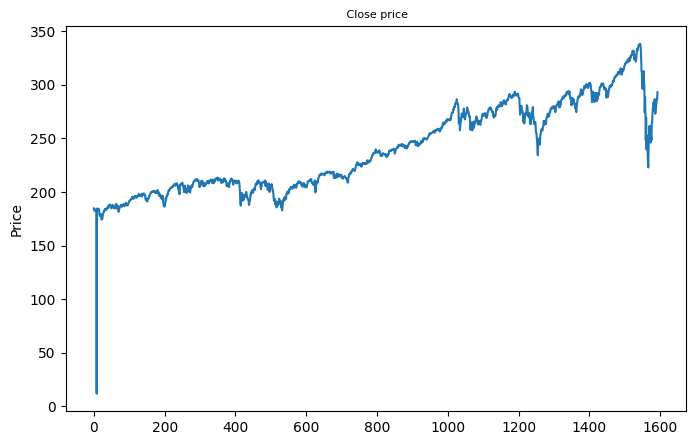

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(data['Close'])
plt.title(' Close price', fontsize=8)
plt.ylabel('Price')
plt.show()

The prices of stocks are showing an upward trend as depicted by the plot of the closing price of the stocks.

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,31.12.2013,184.070007,184.690002,183.929993,184.690002,162.482605,86119900
1,2.01.2014,183.979996,184.070007,182.479996,182.919998,160.925400,119636900
2,3.01.2014,183.979996,183.600006,182.630005,182.889999,160.898972,81390600
3,6.01.2014,183.490005,183.559998,182.080002,182.360001,160.432693,108028200
4,7.01.2014,183.089996,183.789993,182.949997,183.479996,161.418060,86144200


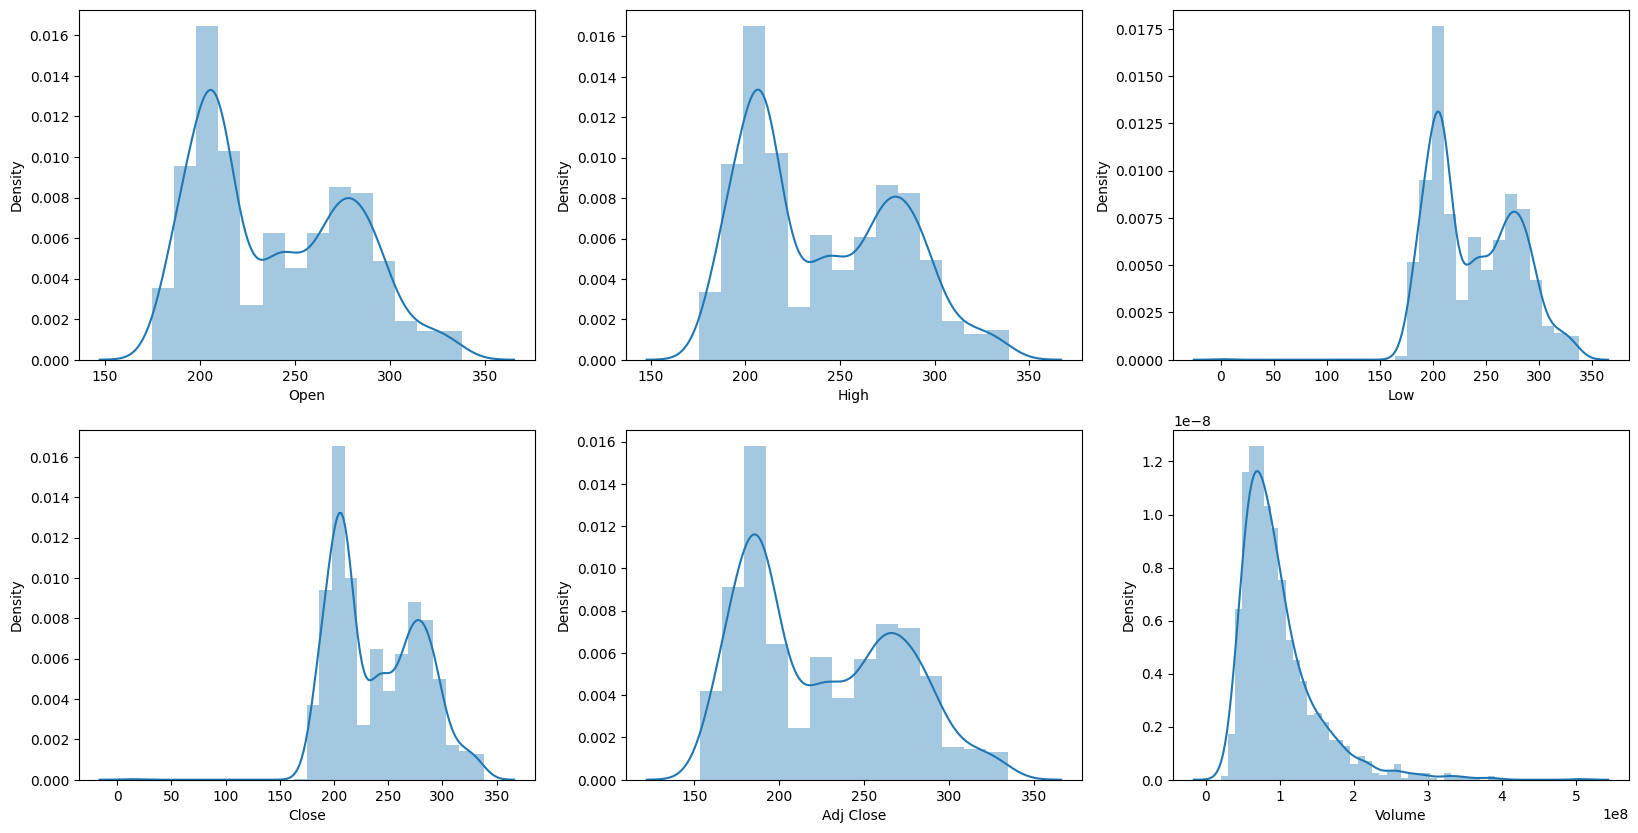

In [ ]:
features = ['Open', 'High', 'Low', 'Close','Adj Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(data[col])
plt.show()

In the distribution plot of stock data, we can see two peaks which means the data has varied significantly in two regions. And the Volume data is left-skewed.

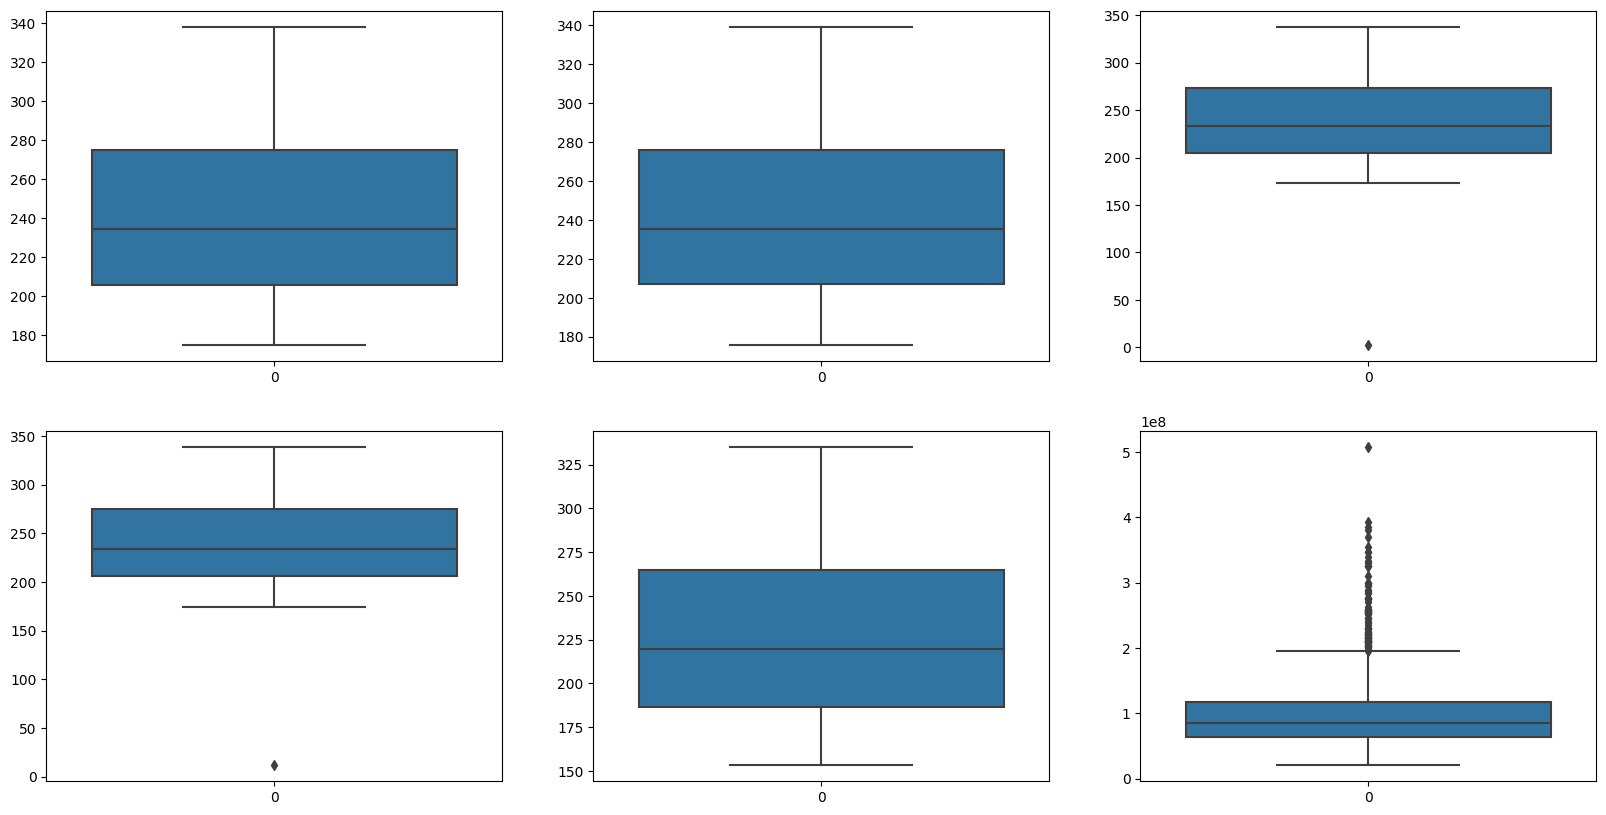

In [ ]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(data[col])
plt.show()

From the above boxplots, we can conclude that  volume data contains outliers in it but the data in the rest of the columns are free from any outlier.

## **Feature Engineering**
Feature Engineering helps to derive some valuable features from the existing ones. These extra features sometimes help in increasing the performance of the model significantly and certainly help to gain deeper insights into the data.

In [ ]:
splitted = data['Date'].str.split('.', expand=True)
 
data['day'] = splitted[1].astype('int')
data['month'] = splitted[0].astype('int')
data['year'] = splitted[2].astype('int')
data.head()
 

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year
0,31.12.2013,184.070007,184.690002,183.929993,184.690002,162.482605,86119900,12,31,2013
1,2.01.2014,183.979996,184.070007,182.479996,182.919998,160.925400,119636900,1,2,2014
2,3.01.2014,183.979996,183.600006,182.630005,182.889999,160.898972,81390600,1,3,2014
3,6.01.2014,183.490005,183.559998,182.080002,182.360001,160.432693,108028200,1,6,2014
4,7.01.2014,183.089996,183.789993,182.949997,183.479996,161.418060,86144200,1,7,2014


Now we have three more columns namely ‘day’, ‘month’ and ‘year’ all these three have been derived from the ‘Date’ column which was initially provided in the data.

In [ ]:
data['is_quarter_end'] = np.where(data['month']%3==0,1,0)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year,is_quarter_end
0,31.12.2013,184.070007,184.690002,183.929993,184.690002,162.482605,86119900,12,31,2013,0
1,2.01.2014,183.979996,184.070007,182.479996,182.919998,160.925400,119636900,1,2,2014,0
2,3.01.2014,183.979996,183.600006,182.630005,182.889999,160.898972,81390600,1,3,2014,1
3,6.01.2014,183.490005,183.559998,182.080002,182.360001,160.432693,108028200,1,6,2014,1
4,7.01.2014,183.089996,183.789993,182.949997,183.479996,161.418060,86144200,1,7,2014,0


A quarter is defined as a group of three months. Every company prepares its quarterly results and publishes them publicly so, that people can analyze the company’s performance. These quarterly results affect the stock prices heavily which is why we have added this feature because this can be a helpful feature for the learning model.

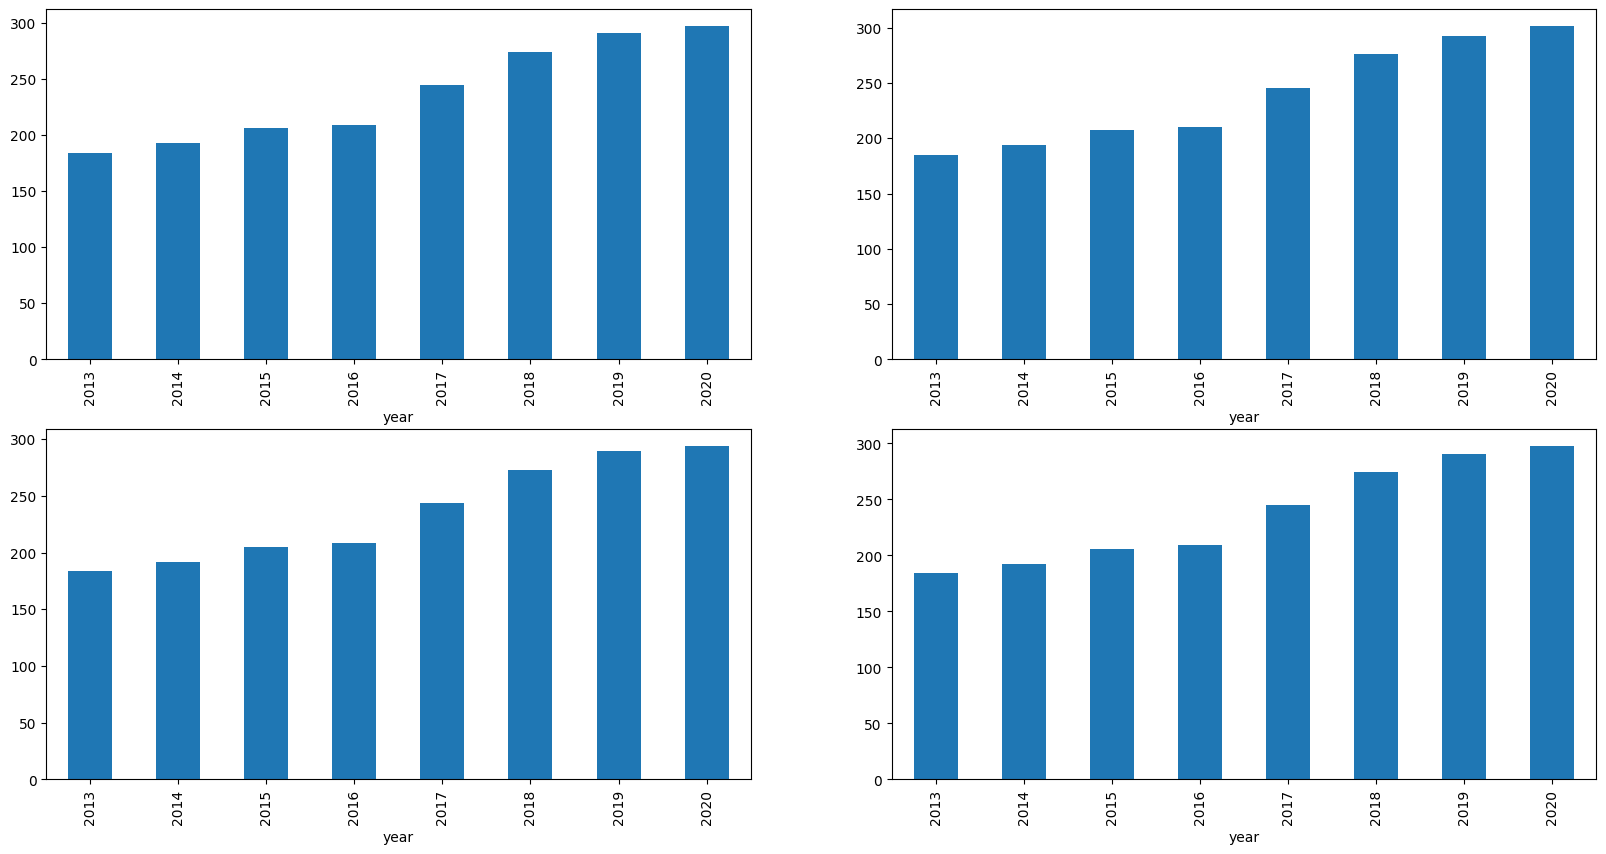

In [ ]:
data_grouped = data.groupby('year').mean()
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(['Open','High','Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

From the above bar graph, we can conclude that the stock prices have doubled from the year 2016 to that in 2017.

In [ ]:
data.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Adj Close,Volume,day,month,year
is_quarter_end,,,,,,,,,
0,239.374780,240.516045,237.932812,239.239231,225.226131,9.790230e+07,6.336457,15.489222,2016.672915
1,239.842111,241.077452,238.594334,239.920551,225.604703,1.001581e+08,6.340304,16.323194,2016.684411


Here are some of the important observations of the above-grouped data:

Prices are higher in the months which are quarter end as compared to that of the non-quarter end months.
The volume of trades is lower in the months which are quarter end.

In [ ]:
data['open-close']  = data['Open'] - data['Close']
data['low-high']  = data['Low'] - data['High']
data['target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)

Above we have added some more columns which will help in the training of our model. We have added the target feature which is a signal whether to buy or not we will train our model to predict this only. But before proceeding let’s check whether the target is balanced or not using a pie chart.

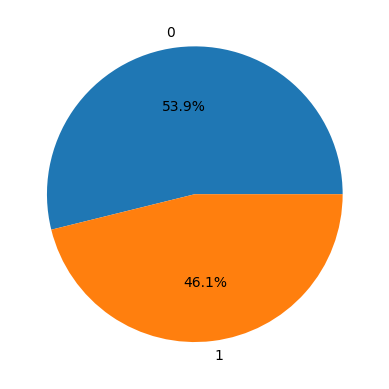

In [ ]:
plt.pie(data['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

we have %46.1 targeted values in our data set


When we add features to our dataset we have to ensure that there are no highly correlated features as they do not help in the learning process of the algorithm

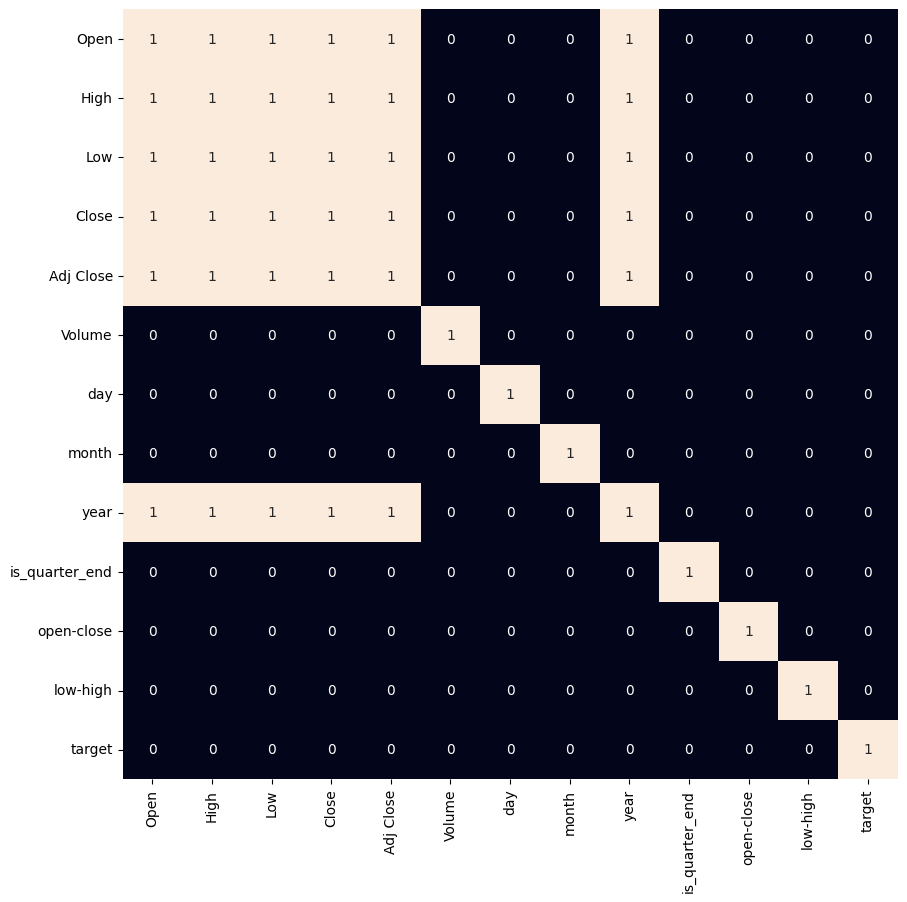

In [ ]:
plt.figure(figsize=(10, 10))
 
# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(data.corr() > 0.9, annot=True, cbar=False)
plt.show()

From the heatmap above, we can tell that there is a high correlation between OHLC, which is quite clear, and the added features, except for the year column, are not highly correlated with each other or with the previously provided features, which means that we are ready to build our model.

## **Data Splitting and Normalization**


In [ ]:
features = data[['open-close', 'low-high', 'is_quarter_end']]
target = data['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(1433, 3) (160, 3)


After selecting the features to train the model on we should normalize the data because normalized data leads to stable and fast training of the model. After that whole data has been split into two parts with a 90/10 ratio so, that we can evaluate the performance of our model on unseen data.

## **Model Development and Evaluation**
Now is the time to train some state-of-the-art machine learning models(Logistic Regression, Support Vector Machine, XGBClassifier), and then based on their performance on the training and validation data we will choose which ML model is serving the purpose at hand better.

For the evaluation metric, we will use the ROC-AUC curve but why this is because instead of predicting the hard probability that is 0 or 1 we would like it to predict soft probabilities that are continuous values between 0 to 1. And with soft probabilities, the ROC-AUC curve is generally used to measure the accuracy of the predictions.

In [ ]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]
 
for i in range(3):
  models[i].fit(X_train, Y_train)
 
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5334635416666667
Validation Accuracy :  0.49587301587301585

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.4709713737468672
Validation Accuracy :  0.5193650793650795

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accur

Among the three models, we have trained XGBClassifier has the highest performance but it is pruned to overfitting as the difference between the training and the validation accuracy is too high. But in the case of the Logistic Regression, this is not the case.

we can see that the LogisticRegression and SVC models have a relatively low accuracy compared to the XGBClassifier model. This means that the XGBClassifier model is more effective at predicting whether or not to buy a stock in a day.

However, the overall accuracy of the XGBClassifier model is still not very high at 52%. This suggests that it may be difficult to accurately predict whether or not to buy a stock in a day using only the data provided by Nasdaq. The lack of accuracy may be due to the complexity of the stock market and the various factors that can influence stock prices.



Now let’s plot a confusion matrix for the validation data.


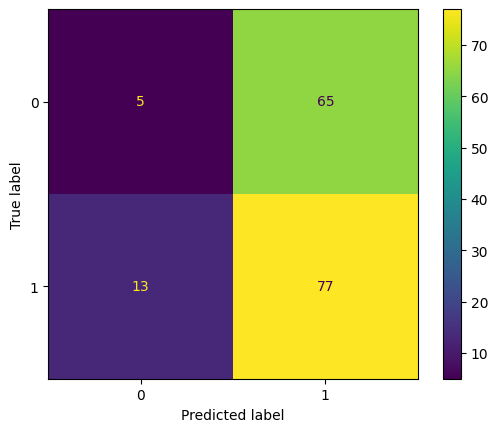

In [ ]:
from sklearn.metrics import confusion_matrix

metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
plt.show()


## **Conclusion**
We can observe that the accuracy achieved by the state-of-the-art ML model is no better than simply guessing with a probability of 60%. Possible reasons for this may be the lack of data or using a very simple model to perform such a complex task as Stock Market prediction.

As a data analyst, it is important to communicate these findings to the client and manage their expectations. While machine learning models can be useful tools for making predictions, they are not foolproof and may not always provide accurate results. It is also important to consider other factors beyond the data provided by Nasdaq, such as market trends, economic indicators, and geopolitical events, when making investment decisions.